## To filter with one percentile

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/poolCount.csv')

# List of read count columns
read_count_columns = ['37_A1', '37_A2', '37_B1', '37_B2', '50_A1', '50_A2', '50_B1', '50_B2']

# Create empty DataFrames for filtered and removed rows
filtered_indices = set(df.index)
removed_indices = set()

# Function to filter the top one percentile and track removed rows
def filter_and_track(column):
    cutoff = column.quantile(0.99)
    removed = column > cutoff
    return removed

# Apply the filter to each read count column
for col in read_count_columns:
    removed = filter_and_track(df[col])
    filtered_indices = filtered_indices - set(df[removed].index)
    removed_indices = removed_indices | set(df[removed].index)

# Convert sets to lists for indexing
filtered_indices = list(filtered_indices)
removed_indices = list(removed_indices)

# Create filtered and removed DataFrames based on indices
filtered_rows = df.loc[filtered_indices]
removed_rows = df.loc[removed_indices]

# Save the filtered and removed DataFrames
filtered_rows.to_csv('poolCount_filtered_file_with_one_percentile.csv', index=False)
removed_rows.to_csv('removed_file_with_one_percentile.csv', index=False)

print("Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.")


Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.


In [3]:
import pandas as pd

# Load the CSV file
csv_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/poolCount_filtered_file_with_one_percentile.csv'
df = pd.read_csv(csv_file_path)

# Save the DataFrame to a text file (txt)
txt_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/poolCount_filtered_file_with_one_percentile.txt'
df.to_csv(txt_file_path, sep='\t', index=False)

In [4]:
import pandas as pd

# Load the count file into a DataFrame
count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/poolCount_filtered_file_with_one_percentile.txt'
df = pd.read_csv(count_file_path, sep='\t')

# Calculate the total counts for each replicate
df['Total_Count_37_A1'] = df['37_A1'].sum()
df['Total_Count_37_A2'] = df['37_A2'].sum()
df['Total_Count_37_B1'] = df['37_B1'].sum()
df['Total_Count_37_B2'] = df['37_B2'].sum()
df['Total_Count_50_A1'] = df['50_A1'].sum()
df['Total_Count_50_A2'] = df['50_A2'].sum()
df['Total_Count_50_B1'] = df['50_B1'].sum()
df['Total_Count_50_B2'] = df['50_B2'].sum()


# Normalize counts for each replicate by dividing by its own Total_Count
df['normalized_37_A1'] = df['37_A1'] / df['Total_Count_37_A1']
df['normalized_37_A2'] = df['37_A2'] / df['Total_Count_37_A2']
df['normalized_37_B1'] = df['37_B1'] / df['Total_Count_37_B1']
df['normalized_37_B2'] = df['37_B2'] / df['Total_Count_37_B2']
df['normalized_50_A1'] = df['50_A1'] / df['Total_Count_50_A1']
df['normalized_50_A2'] = df['50_A2'] / df['Total_Count_50_A2']
df['normalized_50_B1'] = df['50_B1'] / df['Total_Count_50_B1']
df['normalized_50_B2'] = df['50_B2'] / df['Total_Count_50_B2']

# Save the normalized count file
normalized_count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.csv'
df.to_csv(normalized_count_file_path, index=False)

In [5]:
import pandas as pd

# Load the CSV file
csv_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.csv'
df = pd.read_csv(csv_file_path)

# Save the DataFrame to a text file (txt)
txt_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt'
df.to_csv(txt_file_path, sep='\t', index=False)

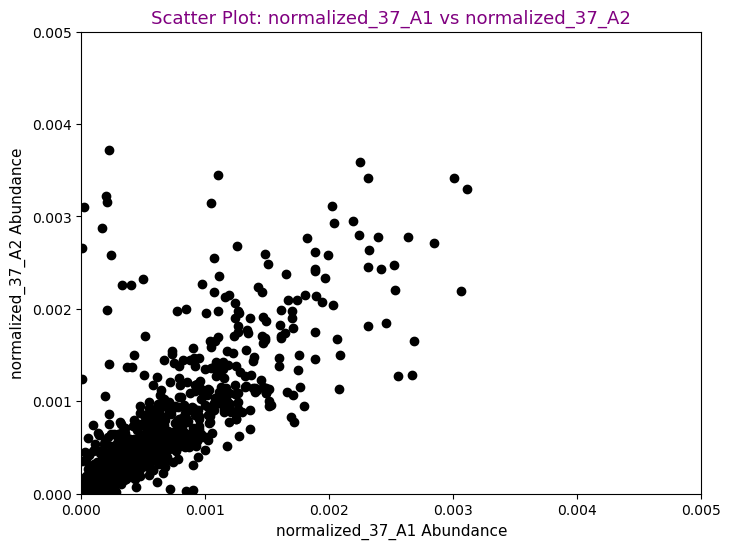

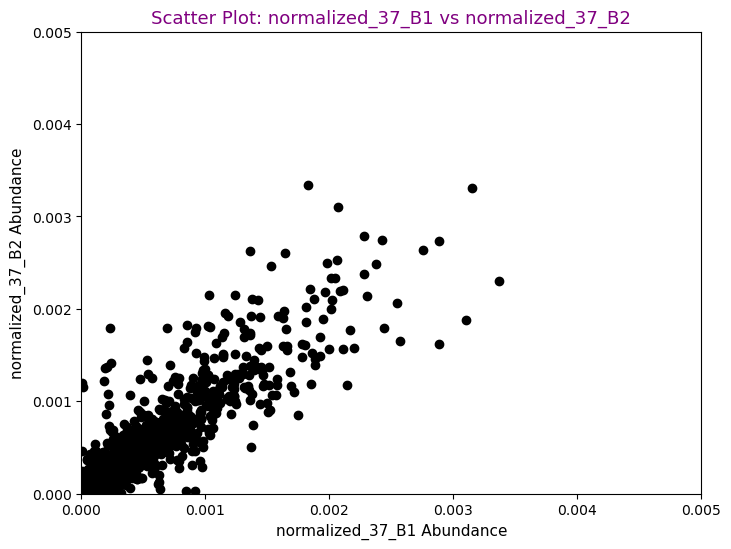

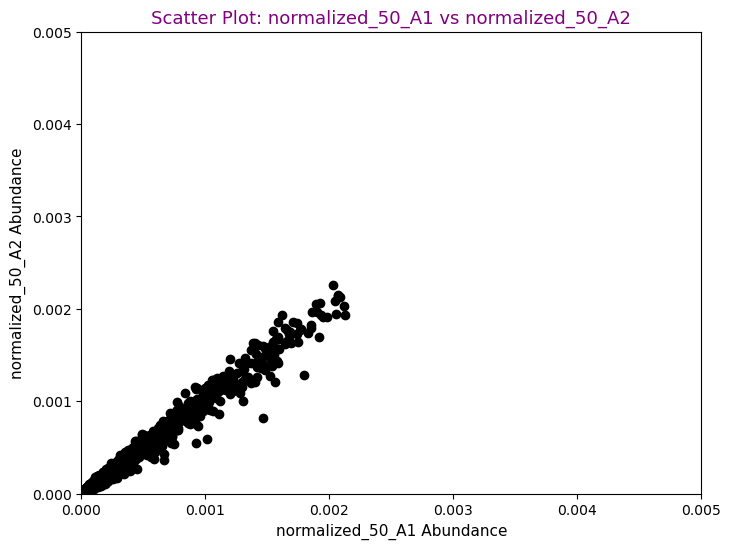

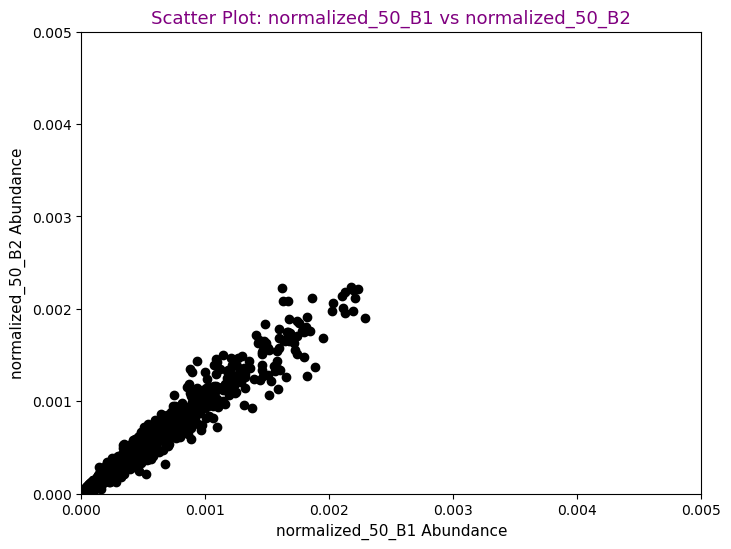

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Define the pairs of columns and their axis limits for scatter plots
column_pairs = [
    ('normalized_37_A1', 'normalized_37_A2'),
    ('normalized_37_B1', 'normalized_37_B2'),
    ('normalized_50_A1', 'normalized_50_A2'),
    ('normalized_50_B1', 'normalized_50_B2')
]

# Set custom axis limits for each pair (adjust as needed)
axis_limits = {
    'normalized_37_A1_normalized_37_A2': {'xlim': (0, 0.005), 'ylim': (0, 0.005)},
    'normalized_37_B1_normalized_37_B2': {'xlim': (0, 0.005), 'ylim': (0, 0.005)},
    'normalized_50_A1_normalized_50_A2': {'xlim': (0, 0.005), 'ylim': (0, 0.005)},
    'normalized_50_B1_normalized_50_B2': {'xlim': (0, 0.005), 'ylim': (0, 0.005)}
}

# Plotting each pair of columns with custom axis limits
for x_column, y_column in column_pairs:
    key = f'{x_column}_{y_column}'
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], color='black')
    plt.xlabel(f'{x_column} Abundance', fontsize=11)
    plt.ylabel(f'{y_column} Abundance', fontsize=11)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=13, color='purple')
    
    # Apply axis limits if available
    if key in axis_limits:
        plt.xlim(axis_limits[key]['xlim'])
        plt.ylim(axis_limits[key]['ylim'])

    plt.show()

## Plots of the individual replicates to check their agreements

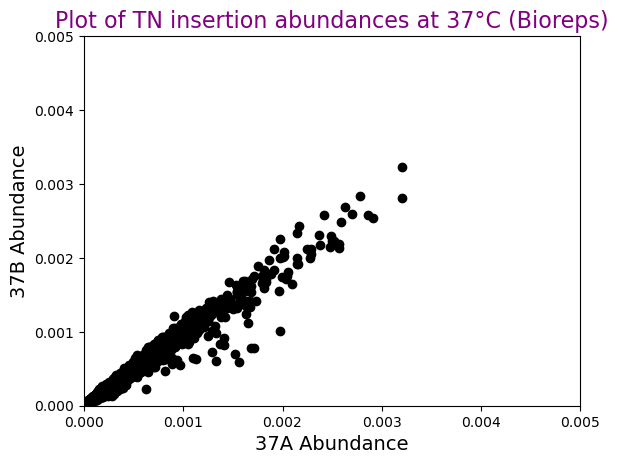

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['normalized_37_A1'] + df['normalized_37_A2']) / 2
y_column = (df['normalized_37_B1'] + df['normalized_37_B2']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37A Abundance', fontsize=14)
plt.ylabel('37B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 37°C (Bioreps)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.005)  # Adjust the range for the x-axis
plt.ylim(0, 0.005)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

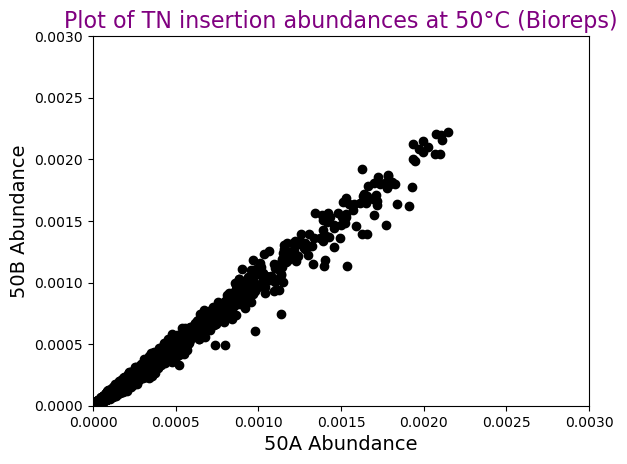

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['normalized_50_A1'] + df['normalized_50_A2']) / 2
y_column = (df['normalized_50_B1'] + df['normalized_50_B2']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('50A Abundance', fontsize=14)
plt.ylabel('50B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 50°C (Bioreps)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.003)  # Adjust the range for the x-axis
plt.ylim(0, 0.003)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

### Plots of 37 oC against 50 oC

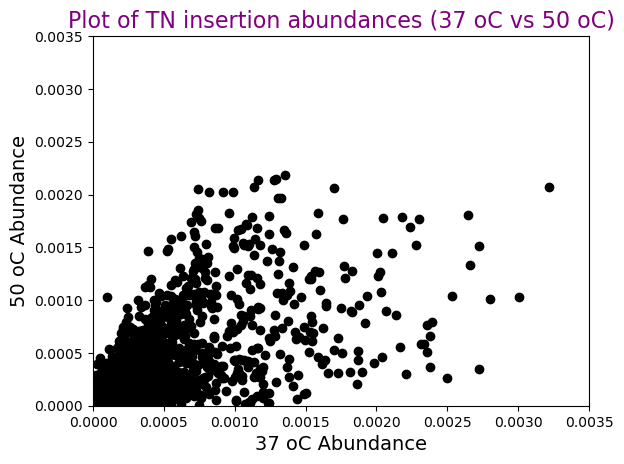

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_one_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['normalized_37_A1'] + df['normalized_37_A2'] + df['normalized_37_B1'] + df['normalized_37_B2']) / 4
y_column = (df['normalized_50_A1'] + df['normalized_50_A2'] + df['normalized_50_B1'] + df['normalized_50_B2']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('50 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 50 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0035)  # Adjust the range for the x-axis
plt.ylim(0, 0.0035)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot

plt.show()


## To filter with top five percentile¶

In [17]:
import pandas as pd

# Load the data
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/poolCount.csv')

# List of read count columns
read_count_columns = ['37_A1', '37_A2', '37_B1', '37_B2', '50_A1', '50_A2', '50_B1', '50_B2']

# Create empty DataFrames for filtered and removed rows
filtered_indices = set(df.index)
removed_indices = set()

# Function to filter the top one percentile and track removed rows
def filter_and_track(column):
    cutoff = column.quantile(0.95)
    removed = column > cutoff
    return removed

# Apply the filter to each read count column
for col in read_count_columns:
    removed = filter_and_track(df[col])
    filtered_indices = filtered_indices - set(df[removed].index)
    removed_indices = removed_indices | set(df[removed].index)

# Convert sets to lists for indexing
filtered_indices = list(filtered_indices)
removed_indices = list(removed_indices)

# Create filtered and removed DataFrames based on indices
filtered_rows = df.loc[filtered_indices]
removed_rows = df.loc[removed_indices]

# Save the filtered and removed DataFrames
filtered_rows.to_csv('poolCount_filtered_file_with_five_percentile.csv', index=False)
removed_rows.to_csv('removed_file_with_five_percentile.csv', index=False)

print("Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.")


Filtering complete. The filtered data is saved in 'filtered_file.csv' and the removed data is saved in 'removed_file.csv'.


In [18]:
import pandas as pd

# Load the CSV file
csv_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/poolCount_filtered_file_with_five_percentile.csv'
df = pd.read_csv(csv_file_path)

# Save the DataFrame to a text file (txt)
txt_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/poolCount_filtered_file_with_five_percentile.txt'
df.to_csv(txt_file_path, sep='\t', index=False)

In [19]:
import pandas as pd

# Load the count file into a DataFrame
count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/poolCount_filtered_file_with_five_percentile.txt'
df = pd.read_csv(count_file_path, sep='\t')

# Calculate the total counts for each replicate
df['Total_Count_37_A1'] = df['37_A1'].sum()
df['Total_Count_37_A2'] = df['37_A2'].sum()
df['Total_Count_37_B1'] = df['37_B1'].sum()
df['Total_Count_37_B2'] = df['37_B2'].sum()
df['Total_Count_50_A1'] = df['50_A1'].sum()
df['Total_Count_50_A2'] = df['50_A2'].sum()
df['Total_Count_50_B1'] = df['50_B1'].sum()
df['Total_Count_50_B2'] = df['50_B2'].sum()


# Normalize counts for each replicate by dividing by its own Total_Count
df['normalized_37_A1'] = df['37_A1'] / df['Total_Count_37_A1']
df['normalized_37_A2'] = df['37_A2'] / df['Total_Count_37_A2']
df['normalized_37_B1'] = df['37_B1'] / df['Total_Count_37_B1']
df['normalized_37_B2'] = df['37_B2'] / df['Total_Count_37_B2']
df['normalized_50_A1'] = df['50_A1'] / df['Total_Count_50_A1']
df['normalized_50_A2'] = df['50_A2'] / df['Total_Count_50_A2']
df['normalized_50_B1'] = df['50_B1'] / df['Total_Count_50_B1']
df['normalized_50_B2'] = df['50_B2'] / df['Total_Count_50_B2']

# Save the normalized count file
normalized_count_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.csv'
df.to_csv(normalized_count_file_path, index=False)

In [20]:
import pandas as pd

# Load the CSV file
csv_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.csv'
df = pd.read_csv(csv_file_path)

# Save the DataFrame to a text file (txt)
txt_file_path = '/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.txt'
df.to_csv(txt_file_path, sep='\t', index=False)

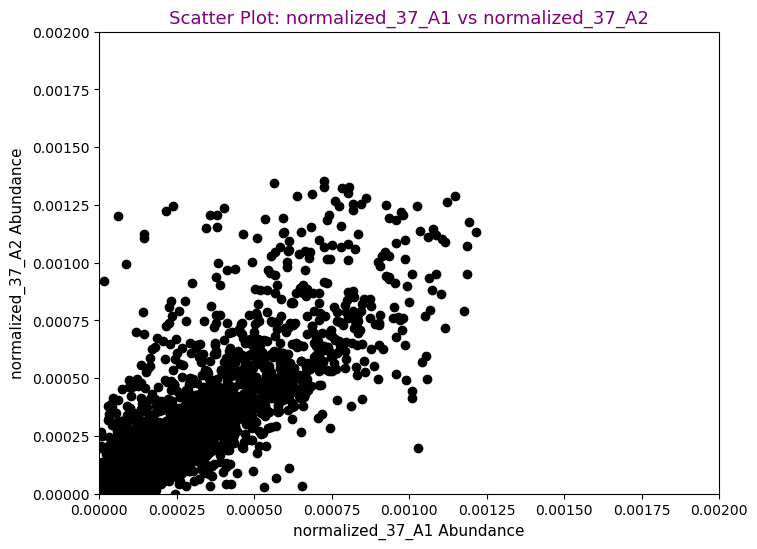

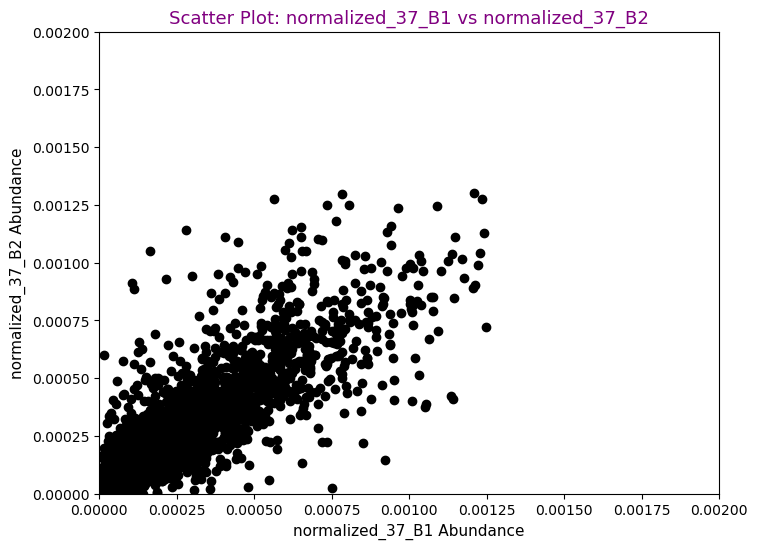

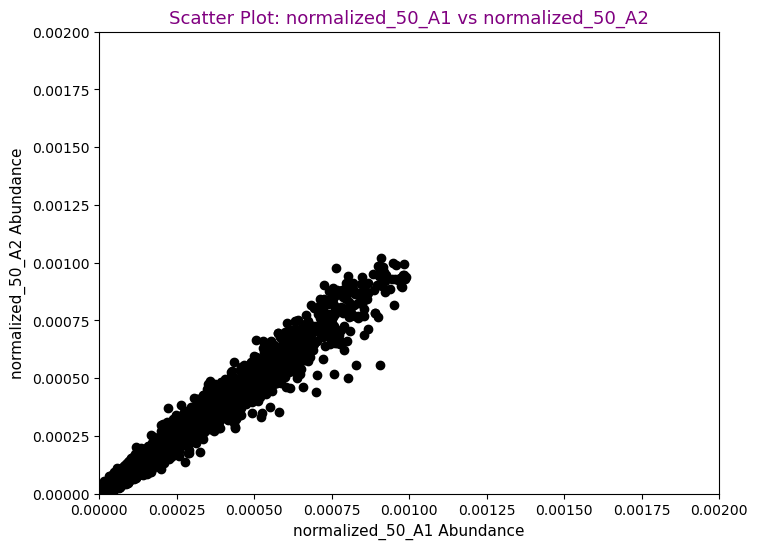

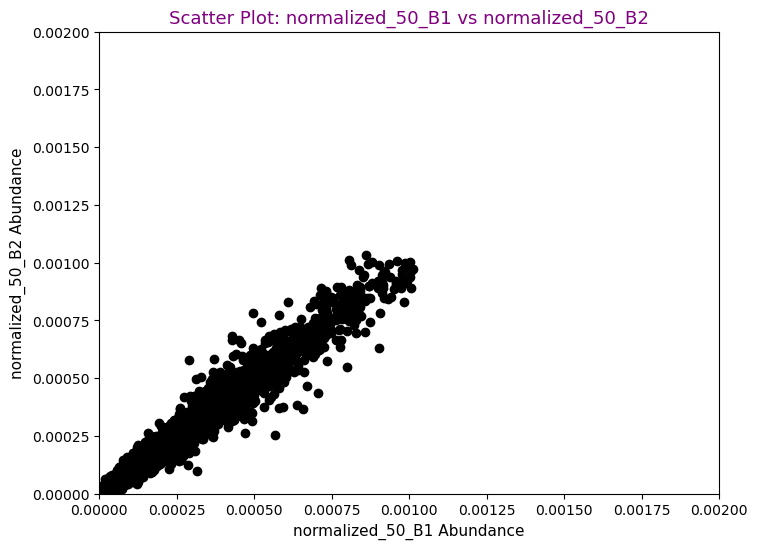

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.txt', sep='\t')

# Define the pairs of columns and their axis limits for scatter plots
column_pairs = [
    ('normalized_37_A1', 'normalized_37_A2'),
    ('normalized_37_B1', 'normalized_37_B2'),
    ('normalized_50_A1', 'normalized_50_A2'),
    ('normalized_50_B1', 'normalized_50_B2')
]

# Set custom axis limits for each pair (adjust as needed)
axis_limits = {
    'normalized_37_A1_normalized_37_A2': {'xlim': (0, 0.002), 'ylim': (0, 0.002)},
    'normalized_37_B1_normalized_37_B2': {'xlim': (0, 0.002), 'ylim': (0, 0.002)},
    'normalized_50_A1_normalized_50_A2': {'xlim': (0, 0.002), 'ylim': (0, 0.002)},
    'normalized_50_B1_normalized_50_B2': {'xlim': (0, 0.002), 'ylim': (0, 0.002)}
}

# Plotting each pair of columns with custom axis limits
for x_column, y_column in column_pairs:
    key = f'{x_column}_{y_column}'
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column], color='black')
    plt.xlabel(f'{x_column} Abundance', fontsize=11)
    plt.ylabel(f'{y_column} Abundance', fontsize=11)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=13, color='purple')
    
    # Apply axis limits if available
    if key in axis_limits:
        plt.xlim(axis_limits[key]['xlim'])
        plt.ylim(axis_limits[key]['ylim'])

    plt.show()

## Plots of the individual replicates to check their agreements

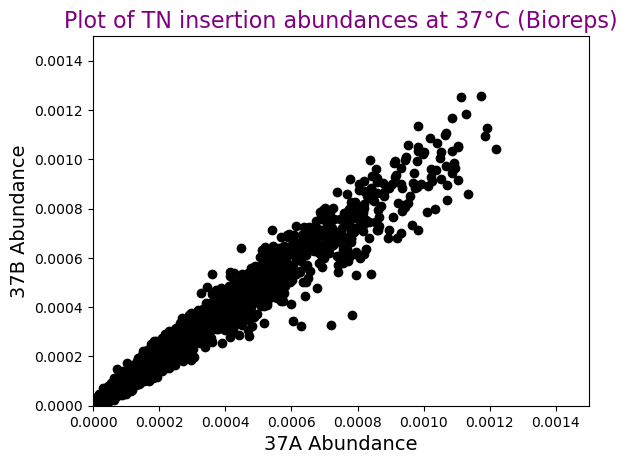

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['normalized_37_A1'] + df['normalized_37_A2']) / 2
y_column = (df['normalized_37_B1'] + df['normalized_37_B2']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37A Abundance', fontsize=14)
plt.ylabel('37B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 37°C (Bioreps)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0015)  # Adjust the range for the x-axis
plt.ylim(0, 0.0015)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

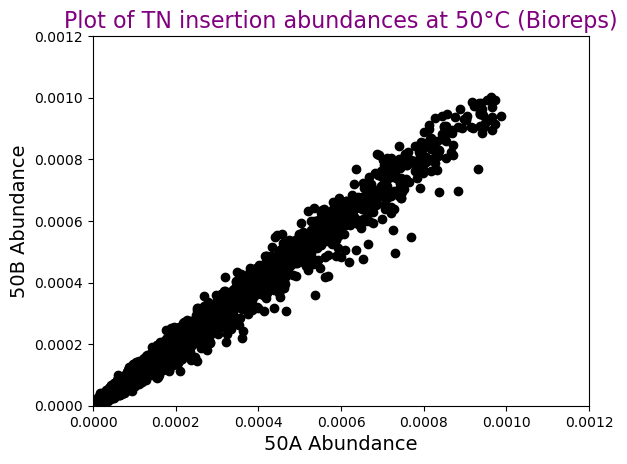

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['normalized_50_A1'] + df['normalized_50_A2']) / 2
y_column = (df['normalized_50_B1'] + df['normalized_50_B2']) / 2

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('50A Abundance', fontsize=14)
plt.ylabel('50B Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances at 50°C (Bioreps)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0012)  # Adjust the range for the x-axis
plt.ylim(0, 0.0012)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

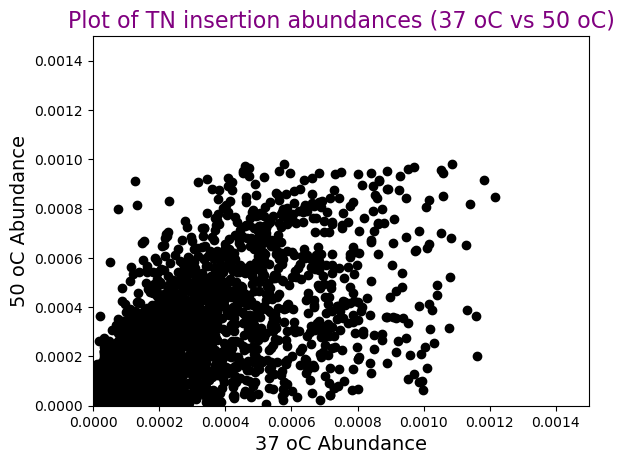

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/Sequencing_with_the_13k_mutants/for_analysis/all_fastqs_available/TNSeq_barseq_outputs_using_all_fastqs_combined_13k_mutants_37•C_vs_50•C_10_28_2024/Filtered_reads_before_normalization/normalized_poolCount_filtered_file_with_five_percentile.txt', sep='\t')

# Calculate the mean of the specified columns for x and y axes
x_column = (df['normalized_37_A1'] + df['normalized_37_A2'] + df['normalized_37_B1'] + df['normalized_37_B2']) / 4
y_column = (df['normalized_50_A1'] + df['normalized_50_A2'] + df['normalized_50_B1'] + df['normalized_50_B2']) / 4

# Create a scatter plot using the calculated means
plt.scatter(x_column, y_column, color='black')
plt.xlabel('37 oC Abundance', fontsize=14)
plt.ylabel('50 oC Abundance', fontsize=14)
plt.title('Plot of TN insertion abundances (37 oC vs 50 oC)', fontsize=16, color='purple')

# Adjust the x and y-axis scale ranges
plt.xlim(0, 0.0015)  # Adjust the range for the x-axis
plt.ylim(0, 0.0015)  # Adjust the range for the y-axis

# Optionally, add grid lines
# plt.grid(True)

# Optionally, save the plot
# plt.savefig("fitness_of_TN_abundances_03_01_2024_37oC_1a.png", dpi=600, bbox_inches='tight')

# Show the plot

plt.show()
